# Rotation

## Rotation period from light curve
Let's try to estimate the stellar rotation period from a TESS [(Ricker et al. 2014)](https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..20R/abstract) light curve of HD 63433 [(Albrecht et al. 2021)](https://ui.adsabs.harvard.edu/abs/2021ApJ...916L...1A/abstract). 

First we'll read in the data and fill gaps (TESS downlinks). For this one we do not to filter the light curve, but for others we might have to.

/home/emil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/emil/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


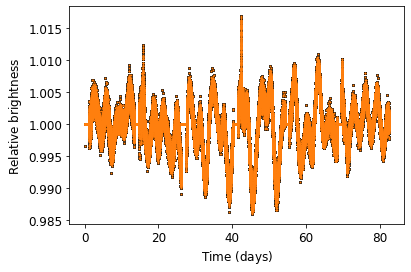

In [1]:
import coPsi
## Instantiate Data
dat = coPsi.Data()
## Read in data file
dat.readData('lc_HD63433.txt')
## Plot the data and return the axis
ax = dat.plotData(return_ax=1)
## Apply a Savitsky-Golay filter, if needed (not the case here)
sgfilter = 0
if sgfilter:
    dat.filterData(window=12001)
    ## Plot on the same axis to compare
    dat.plotData(ax=ax)
## Fill the gaps (here for TESS downlink)
dat.fillGaps()
dat.plotData(ax=ax)

Now that we have a decent looking light curve, we'll try to estimate the stellar rotation period following the approach in [McQuillan et al. (2014)](https://ui.adsabs.harvard.edu/abs/2013MNRAS.432.1203M/abstract).

From median and MAD:
Prot = 6.4487+/-0.0311 d


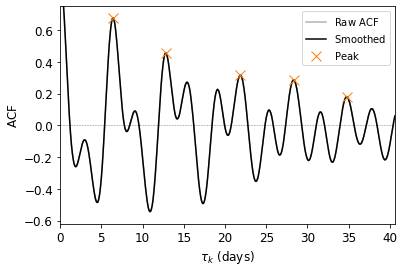

In [2]:
## Instantiate Rotator object, here it inherits from the Data attributes
rot = coPsi.Rotator(x=dat.x,y=dat.y)
## Calculate autocorrelation
rot.ACF()
## Smooth autocorrelation
rot.smoothACF()
## Grab peaks and estimate rotation period
rot.fromPeaks(prominence=(0.35,1.4))

As Rotator inherits from Data, we can also read in the data and fill gaps using Rotator.

From median and MAD:
Prot = 6.4487+/-0.0311 d


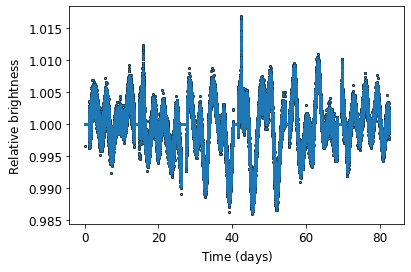

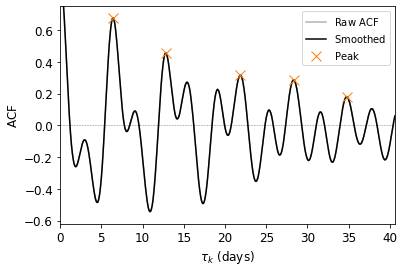

In [3]:
## Read in data directly in Rotator
rot = coPsi.Rotator('lc_HD63433.txt')
## Fill gaps
rot.fillGaps()
## and plot
rot.plotData()
## Calculate autocorrelation
rot.ACF()
## Smooth autocorrelation
rot.smoothACF()
## Grab peaks and estimate rotation period
rot.fromPeaks(prominence=(0.35,1.4))